**Insurance Claim Analysis:** 

Kaggle

[https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health](https:\www.kaggle.com\datasets\thedevastator\insurance-claim-analysis-demographic-and-health)

Demographic and Health Factors

This dataset contains insightful information related to insurance claims, giving us an in-depth look into the demographic patterns of those receiving them. The dataset contains information on patient age, gender, BMI (Body Mass Index), blood pressure levels, diabetic status, number of children, smoking status and region. By analyzing these key factors across geographical areas and across different demographics such as age or gender we can gain a greater understanding of **who is most likely to receive an insurance claim**. This understanding gives us valuable insight that can be used to inform our decision making when considering **potential customers for our services**.

In [2]:
USE insurance_claims
SELECT TOP 10 * 
FROM insurance_data 
ORDER BY NEWID()
--randomly order the rows;

(10 rows affected)

Total execution time: 00:00:00.057

index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
139,140,26,female,35,90,Yes,0,No,northwest,2404
204,205,35,female,22,93,No,0,No,northwest,3176
250,251,45,female,25,80,No,0,No,southeast,3756
481,482,20,male,33,89,Yes,5,No,southeast,6653
76,77,38,male,28,87,No,1,No,southwest,1842
824,825,29,male,28,85,Yes,0,No,northwest,11735
954,955,24,male,32,97,No,2,No,northwest,14119
1138,1139,20,male,28,107,Yes,3,Yes,northwest,24915
783,784,46,female,26,102,Yes,2,No,southwest,11150
861,862,44,female,27,86,Yes,0,No,southwest,12233


Age Group and Averge of Claim

In [9]:
SELECT 
    age_group,
    CAST(AVG(claim) AS DECIMAL(10, 2)) AS avg_claim
FROM 
    (SELECT 
        CASE 
            WHEN age BETWEEN 0 AND 9 THEN '0-9'
			WHEN age BETWEEN 10 AND 19 THEN '10-19'
            WHEN age BETWEEN 20 AND 29 THEN '20-29'
            WHEN age BETWEEN 30 AND 39 THEN '30-39'
			WHEN age BETWEEN 40 AND 49 THEN '40-49'
			WHEN age BETWEEN 50 AND 59 THEN '50-59'
			WHEN age BETWEEN 60 AND 69 THEN '60-69'
			WHEN age BETWEEN 70 AND 79 THEN '70-79'
            ELSE 'Above 80'
        END AS age_group,
        claim
    FROM 
        insurance_data) AS age_groups
GROUP BY 
    age_group
ORDER BY age_group ASC;

(7 rows affected)

Total execution time: 00:00:00.019

age_group,avg_claim
0-9,1137.20
10-19,12696.36
20-29,14133.84
30-39,13027.12
40-49,13142.15
50-59,12970.62
60-69,13179.90


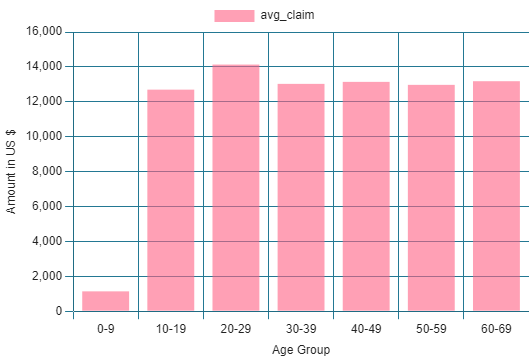

Number of claims per Age Groups

In [4]:
SELECT 
    age_group,
    --CONCAT('$', CAST(AVG(claim) AS DECIMAL(10, 2))) AS avg_claim,
    COUNT(claim) AS total_claims
FROM 
    (SELECT 
        CASE 
            WHEN age BETWEEN 0 AND 9 THEN '0-9'
            WHEN age BETWEEN 10 AND 19 THEN '10-19'
            WHEN age BETWEEN 20 AND 29 THEN '20-29'
            WHEN age BETWEEN 30 AND 39 THEN '30-39'
            WHEN age BETWEEN 40 AND 49 THEN '40-49'
            WHEN age BETWEEN 50 AND 59 THEN '50-59'
            WHEN age BETWEEN 60 AND 69 THEN '60-69'
            WHEN age BETWEEN 70 AND 79 THEN '70-79'
            ELSE 'Above 80'
        END AS age_group,
        claim
    FROM 
        insurance_data) AS age_groups
GROUP BY 
    age_group
ORDER BY 
    age_group ASC;

(7 rows affected)

Total execution time: 00:00:00.011

age_group,total_claims
0-9,5
10-19,45
20-29,307
30-39,372
40-49,387
50-59,203
60-69,21


SUM of Claim Amount per Age Group

In [10]:
SELECT 
  age_group,
  (SUM(claim)) AS Total_claim
    FROM (
        SELECT 
            CASE 
                WHEN age BETWEEN 0 AND 9 THEN '0-9'
                WHEN age BETWEEN 10 AND 19 THEN '10-19'
                WHEN age BETWEEN 20 AND 29 THEN '20-29'
                WHEN age BETWEEN 30 AND 39 THEN '30-39'
                WHEN age BETWEEN 40 AND 49 THEN '40-49'
                WHEN age BETWEEN 50 AND 59 THEN '50-59'
                WHEN age BETWEEN 60 AND 69 THEN '60-69'
                WHEN age BETWEEN 70 AND 79 THEN '70-79'
                ELSE 'Above 80'
            END AS age_group,
            claim
        FROM 
            insurance_data
    ) AS age_groups
GROUP BY 
  age_group
ORDER BY 
  age_group ASC;

(7 rows affected)

Total execution time: 00:00:00.016

age_group,Total_claim
0-9,5686
10-19,571336
20-29,4339088
30-39,4846088
40-49,5086013
50-59,2633036
60-69,276778


Amount of Claim-money per Age Group  

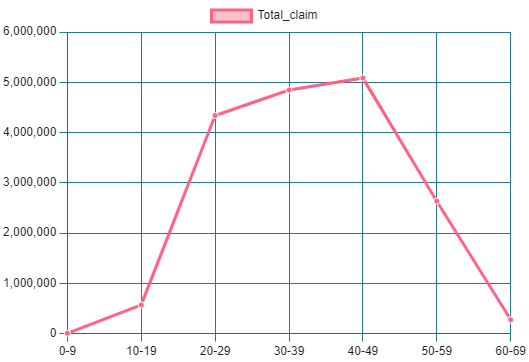

Amount of Claim-money per Age Group

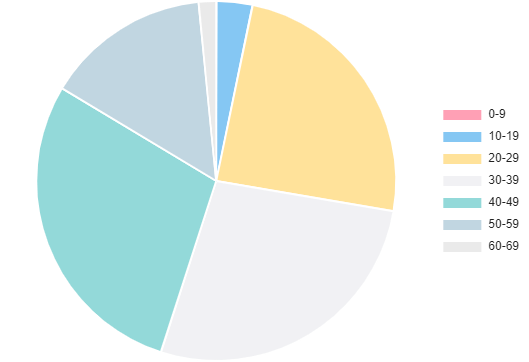

Implications:

- <span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space-collapse: preserve;">IRM can consider tailoring insurance products or offering specialized health packages for age groups 40-49, 30-39, and 50-59, focusing on providing adequate coverage and specific health benefits tailored to the needs of individuals within these age ranges.</span>
- <span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space-collapse: preserve;">For age groups with lower total claim amounts (60-69 and 0-9), IRM could explore offering insurance products with adjusted coverage or pricing models to attract more customers within these demographics.</span>
- <span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space-collapse: preserve;">The unexpected high total claim amount in the 20-29 age group might require further investigation or analysis to understand the specific health factors contributing to these claims. IRM could design targeted health programs or insurance solutions addressing the health needs prevalent in this age group.</span>

BMI and Average of Claim

In [11]:
SELECT 
    ROUND(bmi, 1) AS rounded_bmi,
    AVG(claim) AS avg_claim
FROM 
    insurance_data
GROUP BY 
   ROUND(bmi, 1)
ORDER BY 
    rounded_bmi;

(37 rows affected)

Total execution time: 00:00:00.007

rounded_bmi,avg_claim
16,3833.666666
17,7921.000000
18,11131.800000
19,8919.909090
20,7973.344827
21,9906.125000
22,10643.594594
23,9583.471698
24,12716.596491
25,10737.920000


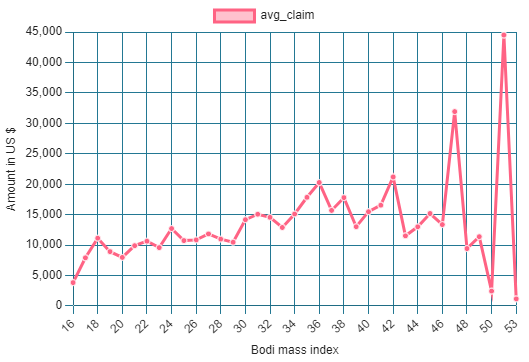

BMI and Total Claims

In [12]:
SELECT 
    bmi AS bodymassind,
    COUNT(claim) AS number_claim
FROM 
    insurance_data
GROUP BY 
   bmi
ORDER BY 
   bmi;


(37 rows affected)

Total execution time: 00:00:00.015

bodymassind,number_claim
16,3
17,11
18,10
19,11
20,29
21,32
22,37
23,53
24,57
25,75


BMI and Total Claims

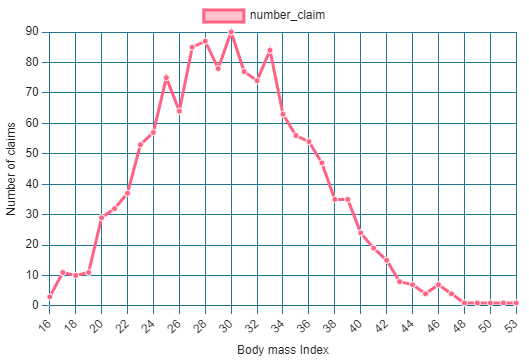

BMI and Total amount of Claim

In [13]:
SELECT 
    bmi,
    SUM(claim) AS total_amount
FROM 
    insurance_data
GROUP BY 
   bmi
ORDER BY 
   bmi;

(37 rows affected)

Total execution time: 00:00:00.009

bmi,total_amount
16,11501
17,87131
18,111318
19,98119
20,231227
21,316996
22,393813
23,507924
24,724846
25,805344


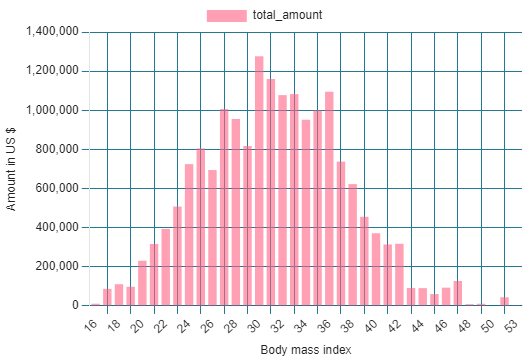

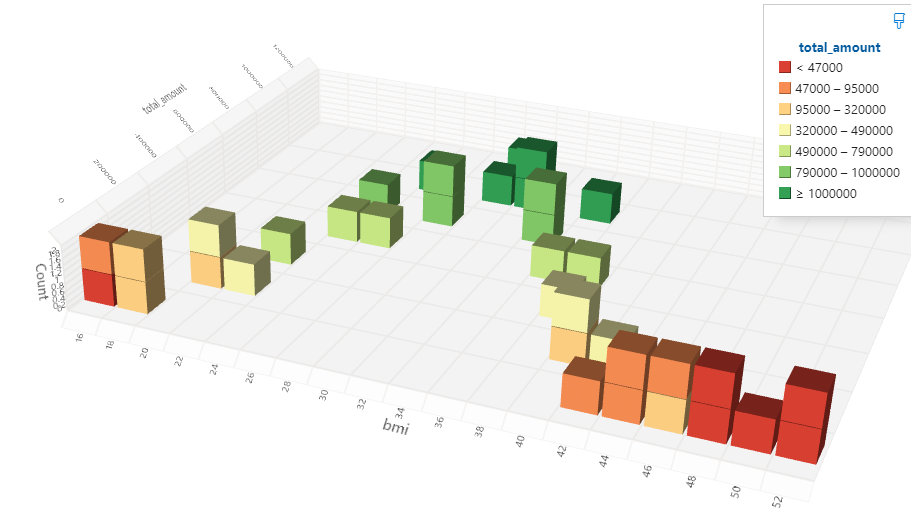

Insight:

- Higher BMI levels (in the range from 26 to 35) correspond to higher total claim amounts, suggesting that individuals within this BMI range tend to make larger insurance claims.
- This insight could imply that health issues or medical needs might be more frequent or severe for individuals within the specified BMI range, potentially impacting the risk assessment and pricing strategies of health and life insurance products.
- IRM could use this information to adjust their underwriting guidelines or develop specialized insurance products tailored to individuals with higher BMI levels. For instance, they could consider offering specific health plans or wellness programs aimed at mitigating health risks associated with higher BMI ranges.